# Hana Gashaw:A Study on AQI of Sofienbergparken
#ID:670555

## Loading and Merging Data from CSV files

In [24]:
import pandas as pd #importing pandas to deal with dataframe

# List of file names for March, April, and May in 2024
file_names = ['Sofienbergparken_march_2024.csv','Sofienbergparken_April_2024.csv','Sofienbergparken_May_2024.csv']
    

# Initializing empty list to store dataframes
dataframes = []

# Read each CSV file and append to the list
for file_name in file_names:
    df = pd.read_csv(file_name)
    dataframes.append(df)

# Check if dataframes list is not empty
if dataframes:
    # Concatenate all dataframes into a single dataframe
    merged_Sof_df = pd.concat(dataframes, ignore_index=True)

    # Drop duplicates
    merged_Sof_df.drop_duplicates(inplace=True)

merged_Sof_df.to_csv('Sofienbergparken.csv')

## Data Inspection

In [25]:
## Display the first 5 rows of the DataFrame to get a quick look at the data
print(merged_Sof_df.head())

   location_id     location_name parameter  value   unit  \
0        10554  Sofienbergparken       no2    5.6  µg/m³   
1        10554  Sofienbergparken       no2    5.2  µg/m³   
2        10554  Sofienbergparken       no2    4.3  µg/m³   
3        10554  Sofienbergparken       no2    4.8  µg/m³   
4        10554  Sofienbergparken       no2    5.5  µg/m³   

                 datetimeUtc              datetimeLocal     timezone  \
0  2024-03-01T01:00:00+00:00  2024-03-01T02:00:00+01:00  Europe/Oslo   
1  2024-03-01T02:00:00+00:00  2024-03-01T03:00:00+01:00  Europe/Oslo   
2  2024-03-01T03:00:00+00:00  2024-03-01T04:00:00+01:00  Europe/Oslo   
3  2024-03-01T04:00:00+00:00  2024-03-01T05:00:00+01:00  Europe/Oslo   
4  2024-03-01T05:00:00+00:00  2024-03-01T06:00:00+01:00  Europe/Oslo   

   latitude  longitude  country_iso  isMobile  isMonitor  \
0  59.92305   10.76574          NaN       NaN        NaN   
1  59.92305   10.76574          NaN       NaN        NaN   
2  59.92305   10.76574    

In [26]:
# Display the last 5 rows of the dataframe
print(merged_Sof_df.tail())

      location_id     location_name parameter  value   unit  \
5715        10554  Sofienbergparken      pm25    6.7  µg/m³   
5716        10554  Sofienbergparken      pm25    6.9  µg/m³   
5717        10554  Sofienbergparken      pm25    3.9  µg/m³   
5718        10554  Sofienbergparken      pm25    3.6  µg/m³   
5719        10554  Sofienbergparken      pm25    3.7  µg/m³   

                    datetimeUtc              datetimeLocal     timezone  \
5715  2024-05-29T20:00:00+00:00  2024-05-29T22:00:00+02:00  Europe/Oslo   
5716  2024-05-29T21:00:00+00:00  2024-05-29T23:00:00+02:00  Europe/Oslo   
5717  2024-05-29T22:00:00+00:00  2024-05-30T00:00:00+02:00  Europe/Oslo   
5718  2024-05-29T23:00:00+00:00  2024-05-30T01:00:00+02:00  Europe/Oslo   
5719  2024-05-30T00:00:00+00:00  2024-05-30T02:00:00+02:00  Europe/Oslo   

      latitude  longitude  country_iso  isMobile  isMonitor  \
5715  59.92305   10.76574          NaN       NaN        NaN   
5716  59.92305   10.76574          NaN      

In [27]:
# Display a concise summary of the DataFrame
merged_Sof_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5720 entries, 0 to 5719
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_id    5720 non-null   int64  
 1   location_name  5720 non-null   object 
 2   parameter      5720 non-null   object 
 3   value          5720 non-null   float64
 4   unit           5720 non-null   object 
 5   datetimeUtc    5720 non-null   object 
 6   datetimeLocal  5720 non-null   object 
 7   timezone       5720 non-null   object 
 8   latitude       5720 non-null   float64
 9   longitude      5720 non-null   float64
 10  country_iso    0 non-null      float64
 11  isMobile       0 non-null      float64
 12  isMonitor      0 non-null      float64
 13  owner_name     5720 non-null   object 
 14  provider       5720 non-null   object 
dtypes: float64(6), int64(1), object(8)
memory usage: 670.4+ KB


## Data Cleaning

#Handling missing values

In [28]:
# Check for missing values in each column and count them
merged_Sof_df.isnull().sum()

location_id         0
location_name       0
parameter           0
value               0
unit                0
datetimeUtc         0
datetimeLocal       0
timezone            0
latitude            0
longitude           0
country_iso      5720
isMobile         5720
isMonitor        5720
owner_name          0
provider            0
dtype: int64

In [29]:
#Define the columns to drop empty columns from the DataFrame
columns_to_drop=['country_iso','isMobile','isMonitor']

# Drop the specified columns from the DataFrame
merged_Sof_df.drop(columns=columns_to_drop,inplace=True)

# Display the first few rows of the DataFrame to get a quick look at the data
print(merged_Sof_df.head())  #output:the 3 columns arenot there

   location_id     location_name parameter  value   unit  \
0        10554  Sofienbergparken       no2    5.6  µg/m³   
1        10554  Sofienbergparken       no2    5.2  µg/m³   
2        10554  Sofienbergparken       no2    4.3  µg/m³   
3        10554  Sofienbergparken       no2    4.8  µg/m³   
4        10554  Sofienbergparken       no2    5.5  µg/m³   

                 datetimeUtc              datetimeLocal     timezone  \
0  2024-03-01T01:00:00+00:00  2024-03-01T02:00:00+01:00  Europe/Oslo   
1  2024-03-01T02:00:00+00:00  2024-03-01T03:00:00+01:00  Europe/Oslo   
2  2024-03-01T03:00:00+00:00  2024-03-01T04:00:00+01:00  Europe/Oslo   
3  2024-03-01T04:00:00+00:00  2024-03-01T05:00:00+01:00  Europe/Oslo   
4  2024-03-01T05:00:00+00:00  2024-03-01T06:00:00+01:00  Europe/Oslo   

   latitude  longitude                         owner_name provider  
0  59.92305   10.76574  Unknown Governmental Organization   Norway  
1  59.92305   10.76574  Unknown Governmental Organization   Norway  

#Checking for Duplicate Values

In [30]:
#Check for duplicate rows in the dataset
merged_LA_df_dup=merged_Sof_df.duplicated().sum()
#printing the value
merged_LA_df_dup  #there is no duplicate value

0

#Converting data types for further Analysis

In [31]:
# converting 'datetimeUtc' column in to datetime format
#changing the datattype for datetimeUtc from object to 
 
merged_Sof_df['datetimeUtc'] = pd.to_datetime(merged_Sof_df['datetimeUtc'])
print((merged_Sof_df['datetimeUtc']).dtype)

datetime64[ns, UTC]


## Data Manuplation

#Pivot the DataFrame to Have the Pollutants as Column

In [32]:
# Pivot the DataFrame with multi-level index including 'location_name' and 'unit'
mergedSof_df_pivot= pd.pivot_table(merged_Sof_df, 
                                index=['datetimeUtc', 'location_name', 'unit'], 
                                columns='parameter', 
                                values='value', 
                                aggfunc='mean')

# Reset index to convert the multi-level index back into columns
mergedSof_df_pivot.reset_index(inplace=True)

# Reorder columns as desired
mergedSof_df_pivot = mergedSof_df_pivot[['location_name', 'datetimeUtc', 'o3', 'pm25','no2','unit']]

# Save the pivoted dataframe to a new CSV file
mergedSof_df_pivot.to_csv('beijing_pivot_2019-2021.csv', index=False)

# Display the first few rows of the pivoted dataframe
print(mergedSof_df_pivot.head())

parameter     location_name               datetimeUtc    o3  pm25  no2   unit
0          Sofienbergparken 2024-03-01 01:00:00+00:00  50.0  -0.4  5.6  µg/m³
1          Sofienbergparken 2024-03-01 02:00:00+00:00  50.0  -1.5  5.2  µg/m³
2          Sofienbergparken 2024-03-01 03:00:00+00:00  52.0   2.6  4.3  µg/m³
3          Sofienbergparken 2024-03-01 04:00:00+00:00  52.0   3.6  4.8  µg/m³
4          Sofienbergparken 2024-03-01 05:00:00+00:00  51.0   7.3  5.5  µg/m³


In [33]:
# Display a concise summary of the the pivotted DataFrame
mergedSof_df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1939 entries, 0 to 1938
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   location_name  1939 non-null   object             
 1   datetimeUtc    1939 non-null   datetime64[ns, UTC]
 2   o3             1918 non-null   float64            
 3   pm25           1874 non-null   float64            
 4   no2            1928 non-null   float64            
 5   unit           1939 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(3), object(2)
memory usage: 91.0+ KB


In [34]:
#Cleaning the pivotted dataframe

# Function to fill half NaNs with 0 and half with the preceding value
def balanced_fillna(series):
    # Get the indices of NaNs
    nan_indices = series[series.isna()].index
    n = len(nan_indices)
    # Split the indices into two halves
    half = n // 2
    # Fill the first half with 0
    series.loc[nan_indices[:half]] = 0
    # Fill the second half with the preceding value
    series.loc[nan_indices[half:]] = series.ffill().loc[nan_indices[half:]]
    return series

# Apply the balanced fillna function to each pollutant column
for pollutant in [ 'o3','pm25','no2']:
    mergedSof_df_pivot[pollutant] = balanced_fillna(mergedSof_df_pivot[pollutant])

# Display the first few rows of the updated DataFrame for verification
print(mergedSof_df_pivot.head())

parameter     location_name               datetimeUtc    o3  pm25  no2   unit
0          Sofienbergparken 2024-03-01 01:00:00+00:00  50.0  -0.4  5.6  µg/m³
1          Sofienbergparken 2024-03-01 02:00:00+00:00  50.0  -1.5  5.2  µg/m³
2          Sofienbergparken 2024-03-01 03:00:00+00:00  52.0   2.6  4.3  µg/m³
3          Sofienbergparken 2024-03-01 04:00:00+00:00  52.0   3.6  4.8  µg/m³
4          Sofienbergparken 2024-03-01 05:00:00+00:00  51.0   7.3  5.5  µg/m³


C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\246528622.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[nan_indices[half:]] = series.ffill().loc[nan_indices[half:]]
C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\246528622.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[nan_indices[:half]] = 0


In [35]:
#Display a concise summary of the the pivotted and filled DataFrame
mergedSof_df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1939 entries, 0 to 1938
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   location_name  1939 non-null   object             
 1   datetimeUtc    1939 non-null   datetime64[ns, UTC]
 2   o3             1939 non-null   float64            
 3   pm25           1939 non-null   float64            
 4   no2            1939 non-null   float64            
 5   unit           1939 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(3), object(2)
memory usage: 91.0+ KB


In [36]:
#Cleaning the pivotted dataframe
# Converting negative values of pollutants to positive

# Define a function to convert all values in a Series to their absolute values
def makepositive(series):
    return series.abs()

# List of pollutant columns that need to be processed
pollutants = ['o3', 'pm25', 'no2']

# Loop over each pollutant column in the list
for pollutant in pollutants:
    # Apply the makepositive function to the current pollutant column in the DataFrame
    mergedSof_df_pivot[pollutant] = makepositive(mergedSof_df_pivot[pollutant])

# Print the first few rows of the updated DataFrame to verify changes
print(mergedSof_df_pivot.head())


parameter     location_name               datetimeUtc    o3  pm25  no2   unit
0          Sofienbergparken 2024-03-01 01:00:00+00:00  50.0   0.4  5.6  µg/m³
1          Sofienbergparken 2024-03-01 02:00:00+00:00  50.0   1.5  5.2  µg/m³
2          Sofienbergparken 2024-03-01 03:00:00+00:00  52.0   2.6  4.3  µg/m³
3          Sofienbergparken 2024-03-01 04:00:00+00:00  52.0   3.6  4.8  µg/m³
4          Sofienbergparken 2024-03-01 05:00:00+00:00  51.0   7.3  5.5  µg/m³


#Renaming Columns

In [37]:
# Rename specific columns in the DataFrame
# The dictionary provided to the 'columns' parameter specifies the old column names as keys and the new column names as values
# 'o3' is renamed to 'O3' and 'no2' is renamed to 'No2'
# inplace=True means that the changes are applied directly to the DataFrame without needing to reassign it
mergedSof_df_pivot.rename(columns={'o3': 'O3', 'no2': 'No2'}, inplace=True)

# Print the first few rows of the updated DataFrame to verify the column name changes
print(mergedSof_df_pivot.head())


parameter     location_name               datetimeUtc    O3  pm25  No2   unit
0          Sofienbergparken 2024-03-01 01:00:00+00:00  50.0   0.4  5.6  µg/m³
1          Sofienbergparken 2024-03-01 02:00:00+00:00  50.0   1.5  5.2  µg/m³
2          Sofienbergparken 2024-03-01 03:00:00+00:00  52.0   2.6  4.3  µg/m³
3          Sofienbergparken 2024-03-01 04:00:00+00:00  52.0   3.6  4.8  µg/m³
4          Sofienbergparken 2024-03-01 05:00:00+00:00  51.0   7.3  5.5  µg/m³


#Filtering the pivotted datafram by month

In [38]:
# Filter for December
March_df = mergedSof_df_pivot[mergedSof_df_pivot['datetimeUtc'].dt.month == 3]

# Filter for February
April_df = mergedSof_df_pivot[mergedSof_df_pivot['datetimeUtc'].dt.month ==4]

# Filter for May
May_df = mergedSof_df_pivot[mergedSof_df_pivot['datetimeUtc'].dt.month == 5]

# Display the first few rows of each dataframe
print("March Data:")
print(March_df.head())

print("\nApril Data:")
print(April_df.head())

print("\nMay Data:")
print(May_df.head())

March Data:


parameter     location_name               datetimeUtc    O3  pm25  No2   unit
0          Sofienbergparken 2024-03-01 01:00:00+00:00  50.0   0.4  5.6  µg/m³
1          Sofienbergparken 2024-03-01 02:00:00+00:00  50.0   1.5  5.2  µg/m³
2          Sofienbergparken 2024-03-01 03:00:00+00:00  52.0   2.6  4.3  µg/m³
3          Sofienbergparken 2024-03-01 04:00:00+00:00  52.0   3.6  4.8  µg/m³
4          Sofienbergparken 2024-03-01 05:00:00+00:00  51.0   7.3  5.5  µg/m³

April Data:
parameter     location_name               datetimeUtc    O3  pm25  No2   unit
564        Sofienbergparken 2024-04-01 01:00:00+00:00  24.0  2.60  4.6  µg/m³
565        Sofienbergparken 2024-04-01 02:00:00+00:00  25.0  4.00  3.5  µg/m³
566        Sofienbergparken 2024-04-01 03:00:00+00:00  23.0  1.60  5.8  µg/m³
567        Sofienbergparken 2024-04-01 04:00:00+00:00  38.0  4.50  3.6  µg/m³
568        Sofienbergparken 2024-04-01 05:00:00+00:00  43.0  0.98  3.0  µg/m³

May Data:
parameter     location_name             

In [39]:
import pandas as pd
ppm_to_ugm3 = 2140
breakpoints_O3 = [(0.000 * ppm_to_ugm3, 0.054 * ppm_to_ugm3, 0, 50),
                  (0.055 * ppm_to_ugm3, 0.070 * ppm_to_ugm3, 51, 100),
                  (0.071 * ppm_to_ugm3, 0.085 * ppm_to_ugm3, 101, 150),
                  (0.086 * ppm_to_ugm3, 0.105 * ppm_to_ugm3, 151, 200),
                  (0.106 * ppm_to_ugm3, 0.200 * ppm_to_ugm3, 201, 300),
                  (0.201 * ppm_to_ugm3, 0.404 * ppm_to_ugm3, 301, 400),
                  (0.405 * ppm_to_ugm3, 0.504 * ppm_to_ugm3, 401, 500)]

# Breakpoints for PM2.5 and NO2 are already in µg/m³
breakpoints_pm25 = [(0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150),
                    (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 350.4, 301, 400),
                    (350.5, 500.4, 401, 500)]

breakpoints_No2 = [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150),
                   (361, 649, 151, 200), (650, 1249, 201, 300), (1250, 1649, 301, 400),
                   (1650, 2049, 401, 500)]

# Function to calculate AQI
def calculate_aqi(concentration, breakpoints):
    for bp in breakpoints:
        if bp[0] <= concentration <= bp[1]:
            C = concentration
            BP_hi = bp[1]
            BP_lo = bp[0]
            I_hi = bp[3]
            I_lo = bp[2]
            aqi = ((I_hi - I_lo) / (BP_hi - BP_lo)) * (C - BP_lo) + I_lo
            return round(aqi)
    return None

# Calculate AQI for each pollutant and add new columns
mergedSof_df_pivot['AQI_O3'] = mergedSof_df_pivot['O3'].apply(lambda x: calculate_aqi(x, breakpoints_O3))
mergedSof_df_pivot['AQI_PM25'] = mergedSof_df_pivot['pm25'].apply(lambda x: calculate_aqi(x, breakpoints_pm25))
mergedSof_df_pivot['AQI_NO2'] = mergedSof_df_pivot['No2'].apply(lambda x: calculate_aqi(x, breakpoints_No2))

# Calculate the overall AQI by taking the maximum AQI value from each pollutant
mergedSof_df_pivot['AQI'] = mergedSof_df_pivot[['AQI_O3', 'AQI_PM25', 'AQI_NO2']].max(axis=1)

mergedSof_df_pivot.to_csv('pivot_Siefenbergparken') 

# Print the first few rows of the updated DataFrame to verify changes
print(mergedSof_df_pivot.head())


parameter     location_name               datetimeUtc    O3  pm25  No2   unit  \
0          Sofienbergparken 2024-03-01 01:00:00+00:00  50.0   0.4  5.6  µg/m³   
1          Sofienbergparken 2024-03-01 02:00:00+00:00  50.0   1.5  5.2  µg/m³   
2          Sofienbergparken 2024-03-01 03:00:00+00:00  52.0   2.6  4.3  µg/m³   
3          Sofienbergparken 2024-03-01 04:00:00+00:00  52.0   3.6  4.8  µg/m³   
4          Sofienbergparken 2024-03-01 05:00:00+00:00  51.0   7.3  5.5  µg/m³   

parameter  AQI_O3  AQI_PM25  AQI_NO2  AQI  
0              22         2        5   22  
1              22         6        5   22  
2              22        11        4   22  
3              22        15        5   22  
4              22        30        5   30  


#Creating and adding new columns to the pivotted dataframe

## Exploratory Data Analysis

In [40]:
print(mergedSof_df_pivot.describe())

parameter           O3         pm25          No2       AQI_O3     AQI_PM25  \
count      1939.000000  1939.000000  1939.000000  1939.000000  1939.000000   
mean         62.892019     4.712505     7.306935    27.436307    19.450748   
std          25.625061     3.584121     6.490312    13.239418    14.352701   
min           0.000000     0.000000     0.000000     0.000000     0.000000   
25%          50.000000     1.900000     3.400000    22.000000     8.000000   
50%          66.000000     4.000000     5.500000    29.000000    17.000000   
75%          80.000000     6.700000     8.800000    35.000000    28.000000   
max         250.000000    22.000000    57.000000   212.000000    72.000000   

parameter      AQI_NO2          AQI  
count      1939.000000  1939.000000  
mean          6.860237    32.080970  
std           6.113019    12.782823  
min           0.000000     0.000000  
25%           3.000000    26.000000  
50%           5.000000    32.000000  
75%           8.000000    38.00

In [41]:
median_value=mergedSof_df_pivot['AQI'].median()
median_value

32.0

In [42]:
# Calculate Q1, Q3, and IQR for the AQI column
q1 = mergedSof_df_pivot['AQI'].quantile(0.25)
q3 = mergedSof_df_pivot['AQI'].quantile(0.75)
inter_quartile_range = q3 - q1

q1, q3, inter_quartile_range


(26.0, 38.0, 12.0)

# Exploring The data using Visiualization

## Histogram for Sofienbergparken 
#The majority of AQI readings are clustered around the lower end of the scale, primarily between 0 and 50.

#This indicates that most of the time, the air quality is relatively good, as AQI levels in this range typically correspond to "Good" air quality.

#outliers are represented as individual bars that fall outside the main concentration of data (0-50 AQI range)

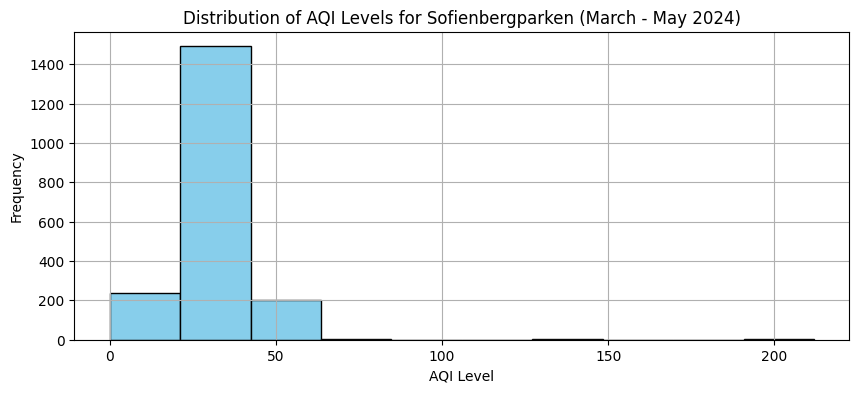

In [43]:
# Plotting the histogram for AQI levels
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.hist(mergedSof_df_pivot['AQI'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('AQI Level')
plt.ylabel('Frequency')
plt.title('Distribution of AQI Levels for Sofienbergparken (March - May 2024)')
plt.grid(True)
plt.show()


# Box Plot
#vertically the number 1 indicates the figure is for 1 group

#The line inside the box indicate that the median is around 32

#The width of the box indicates the interquartile range(distribution betweenq1 and q3) is between 26 & 38.

#The small circles scattered horizontally out side the box indicate outliers

#Overall Distribution
#The bulk of the AQI levels are concentrated between 0 and 50, indicating generally good air quality.

#The presence of outliers suggests that while the air quality was mostly good, there were occasional spikes in AQI levels, which could be due to specific events or conditions.

#The box plot shows a right skew (positive skew), as the tail on the right side of the median is longer than on the left side.(the presence of high positive values as an outlier)


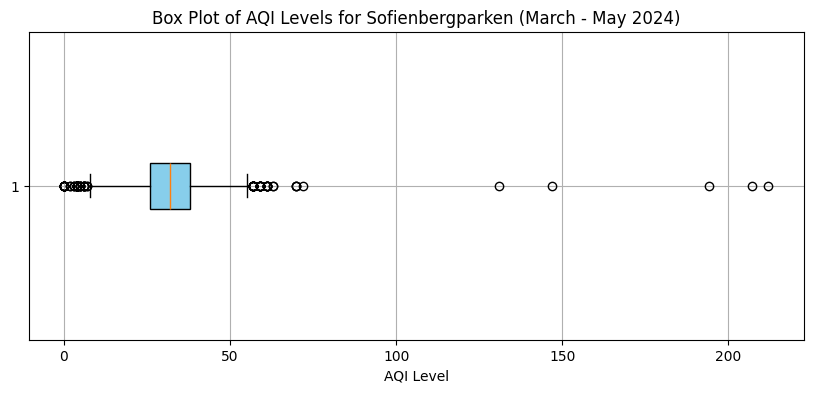

In [44]:
# Plotting the box plot for AQI levels
plt.figure(figsize=(10, 4))
plt.boxplot(mergedSof_df_pivot['AQI'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.xlabel('AQI Level')
plt.title('Box Plot of AQI Levels for Sofienbergparken (March - May 2024)')
plt.grid(True)
plt.show()

# Scatter Plot

#1,O3 (Ozone) vs AQI:

X-axis: O3 concentration 

Y-axis: AQI

Observation: There is a clear upward trend indicating that as O3 concentration increases, the AQI also increases. This suggests a strong positive correlation between O3 levels and AQI.O3 (Ozone) appears to be the main pollutant, as it is associated with the highest AQI value and has strong positive correlation.

#2,PM2.5(Nitrogen Dioxide) vs AQI:

X-axis: PM2.5 concentration 

Y-axis: AQI
Observation: Most of the data points are clustered at lower concentrations of PM2.5 and AQI values. There is a slight upward trend, indicating a positive correlation between PM2.5 concentration and AQI. However, this correlation is less pronounced compared to O3.

#3,NO2  vs AQI:

X-axis: NO2 (Nitrogen Dioxide) concentration
 
Y-axis: AQI
Observation:There is an upward trend, indicating that as NO2 concentration increases, AQI also increases. The data shows a strong positive correlation between NO2 levels and AQI. Higher NO2 levels are associated with higher AQI, indicating poorer air quality.

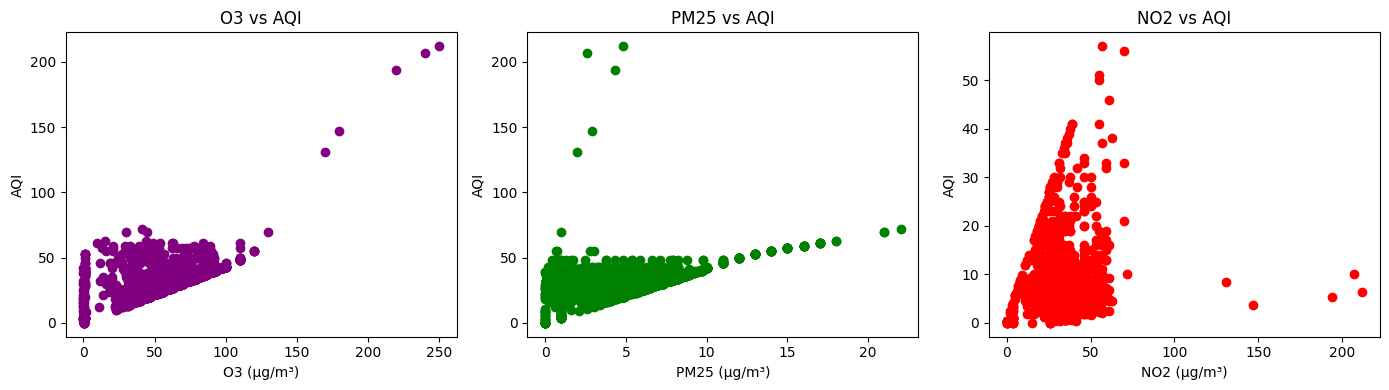

In [45]:
# Create scatter plots
plt.figure(figsize=(14, 4))

# Scatter plot for O3 vs AQI
plt.subplot(1, 3, 1)
plt.scatter(mergedSof_df_pivot["O3"], mergedSof_df_pivot["AQI"], color='purple')
plt.title('O3 vs AQI')
plt.xlabel('O3 (µg/m³)')
plt.ylabel('AQI')

# Scatter plot for PM25 vs AQI
plt.subplot(1, 3, 2)
plt.scatter(mergedSof_df_pivot["pm25"], mergedSof_df_pivot["AQI"], color='green')
plt.title('PM25 vs AQI')
plt.xlabel('PM25 (µg/m³)')
plt.ylabel('AQI')

# Scatter plot for NO2 vs AQI
plt.subplot(1, 3, 3)
plt.scatter(mergedSof_df_pivot["AQI"], mergedSof_df_pivot["No2"], color='red')
plt.title('NO2 vs AQI')
plt.xlabel('NO2 (µg/m³)')
plt.ylabel('AQI')

plt.tight_layout()
plt.show()

# Time Series Analysis

#overall AQI over time plot

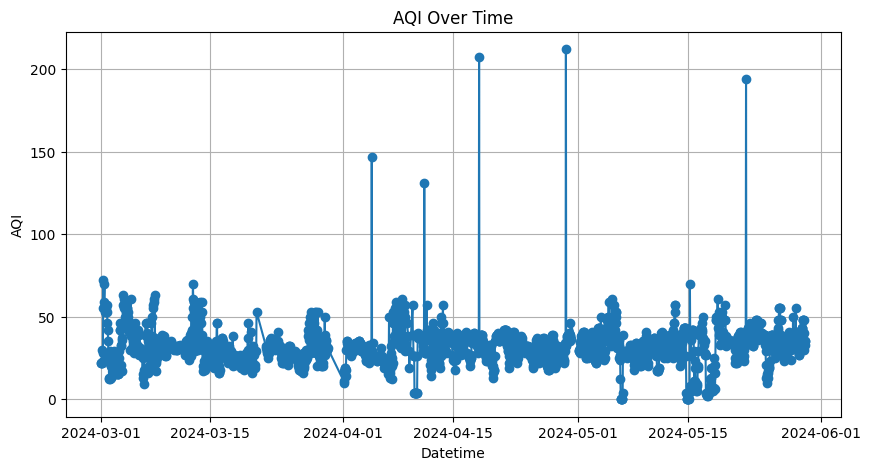

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

mergedSof_df_pivot['datetimeUtc'] = pd.to_datetime(mergedSof_df_pivot['datetimeUtc'])
mergedSof_df_pivot.set_index('datetimeUtc', inplace=True)

# Plotting the AQI data
plt.figure(figsize=(10, 5))
plt.plot(mergedSof_df_pivot['AQI'], marker='o', linestyle='-')
plt.title('AQI Over Time')
plt.xlabel('Datetime')
plt.ylabel('AQI')
plt.grid(True)
plt.show()


#1,Trend Component of AQI

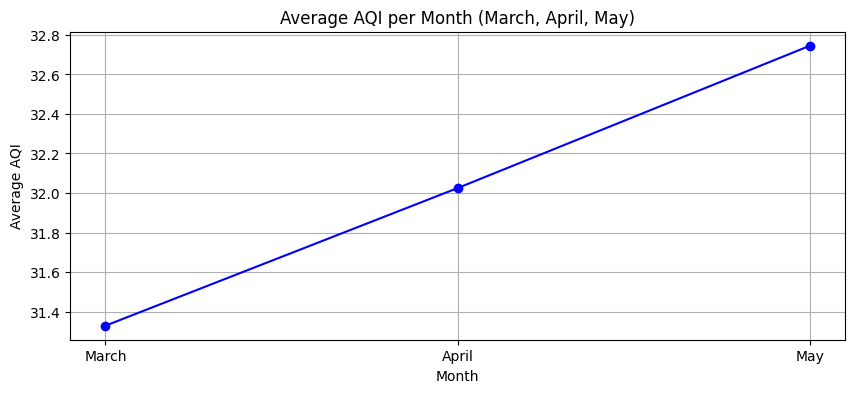

In [48]:
# Create a new column for the month
mergedSof_df_pivot['Month'] = mergedSof_df_pivot.index.month

# Filter data for March, April, and May
filtered_df = mergedSof_df_pivot[mergedSof_df_pivot['Month'].isin([3, 4, 5])]

# Calculate the average AQI per month
pivot_table = filtered_df.pivot_table(values='AQI', index='Month', aggfunc='mean')

# Create a line graph
plt.figure(figsize=(10, 4))
plt.plot(pivot_table.index, pivot_table['AQI'], marker='o', linestyle='-', color='b')
plt.title('Average AQI per Month (March, April, May)')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(ticks=[3, 4, 5], labels=['March', 'April', 'May'])
plt.grid(True)
plt.show()

#2,Seasonal Component of AQI

#Average AQI per hour for each month

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a new column for the month
mergedSof_df_pivot['Month'] = mergedSof_df_pivot.index.month

# Create a new column for the hour
mergedSof_df_pivot['Hour'] = mergedSof_df_pivot.index.hour

# Calculate the average AQI per hour for each month
pivot_table = mergedSof_df_pivot.pivot_table(values='AQI', index='Hour', columns='Month', aggfunc='mean')



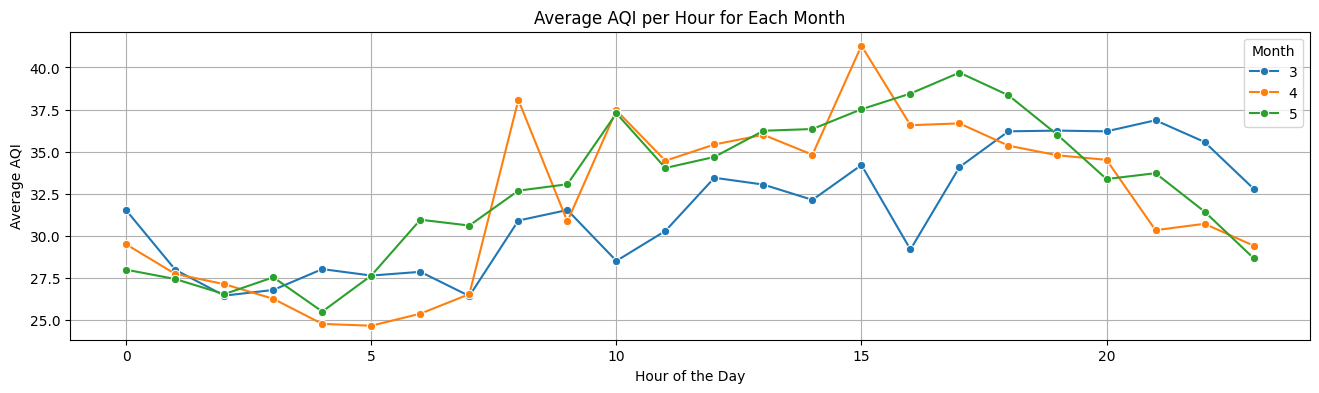

In [50]:
# Reset the index to make 'Hour' a column
pivot_table_reset = pivot_table.reset_index()

# Melt the table to long-form format suitable for seaborn
melted_pivot_table = pivot_table_reset.melt(id_vars=['Hour'], var_name='Month', value_name='Average_AQI')

# Plot using seaborn
plt.figure(figsize=(16, 4))
sns.lineplot(data=melted_pivot_table, x='Hour', y='Average_AQI', hue='Month', palette='tab10', marker='o')

# Add title and labels
plt.title('Average AQI per Hour for Each Month')
plt.xlabel('Hour of the Day')
plt.ylabel('Average AQI')
plt.legend(title='Month', loc='upper right')
plt.grid(True)
plt.show()


# Visualization

In [51]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [52]:
! pip install plotly


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#Average AQI per day of the week

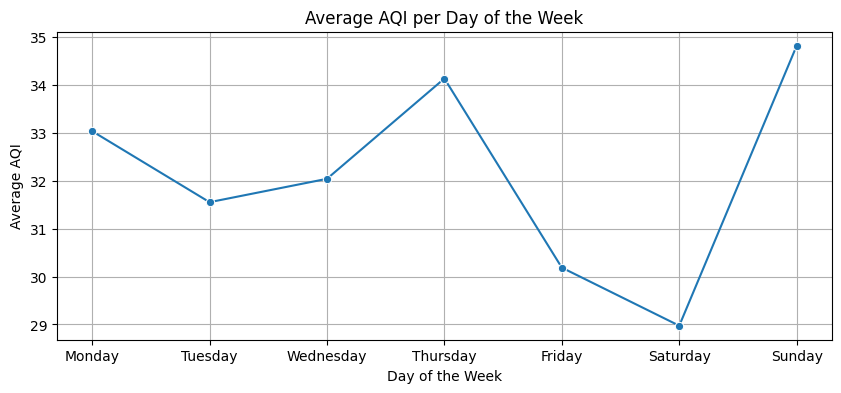

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column for the day of the week
mergedSof_df_pivot['DayOfWeek'] = mergedSof_df_pivot.index.dayofweek

# Calculate the average AQI per day of the week
pivot_table = mergedSof_df_pivot.pivot_table(values='AQI', index='DayOfWeek', aggfunc='mean')

# Reset the index to make 'DayOfWeek' a column
pivot_table_reset = pivot_table.reset_index()

# Map day numbers to day names
day_name_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
pivot_table_reset['DayOfWeek'] = pivot_table_reset['DayOfWeek'].map(day_name_map)

# Sort by the original day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table_reset['DayOfWeek'] = pd.Categorical(pivot_table_reset['DayOfWeek'], categories=day_order, ordered=True)
pivot_table_reset = pivot_table_reset.sort_values('DayOfWeek')

# Plot using seaborn
plt.figure(figsize=(10, 4))
sns.lineplot(data=pivot_table_reset, x='DayOfWeek', y='AQI', marker='o', linestyle='-')

# Add title and labels
plt.title('Average AQI per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average AQI')
plt.grid(True)
plt.show()


3,Residual Component of AQI

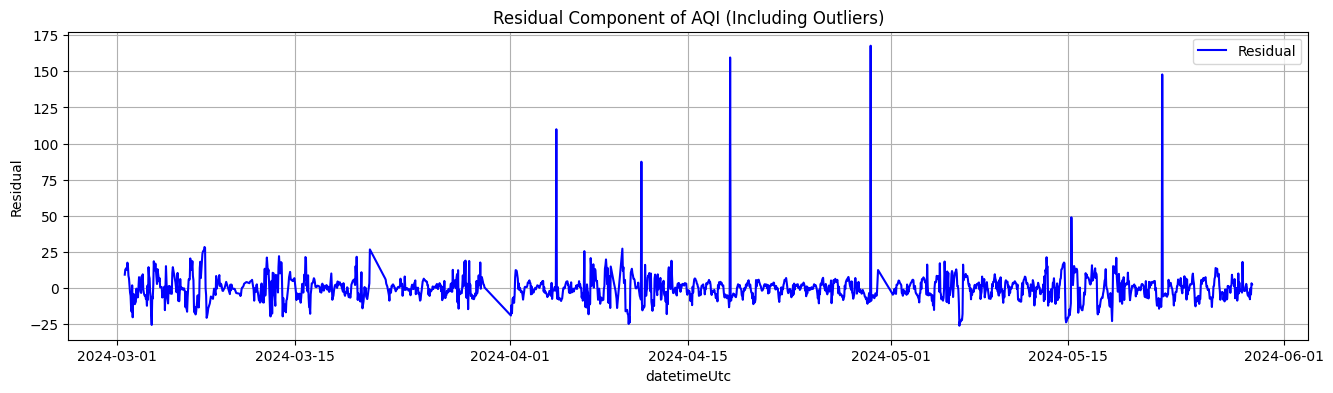

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm



# Decompose the time series for AQI without removing outliers
decomposition = sm.tsa.seasonal_decompose(mergedSof_df_pivot['AQI'], model='additive', period=24)
residual = decomposition.resid

# Plot the residual component
plt.figure(figsize=(16, 4))
plt.plot(mergedSof_df_pivot.index, residual, label='Residual', color='blue')
plt.title('Residual Component of AQI (Including Outliers)')
plt.xlabel('datetimeUtc')
plt.ylabel('Residual')
plt.legend()
plt.grid(True)
plt.show()

#A Heatmap of Average AQI per Month

#Color Coding:

#Blue:lower AQI values, Red:higher AQI values

#Observation:

#March (3): Average AQI is 31, April (4): Average AQI is 32.0, May (5): Average AQI is 32.7

#While there are slight differences in the average AQI values for March, April, and May, the overall air quality is fairly balanced with no significant gaps. This suggests that Sofienbergparken experiences relatively stable air quality conditions over these months, with only minor variations that do not dramatically affect the overall air quality. 


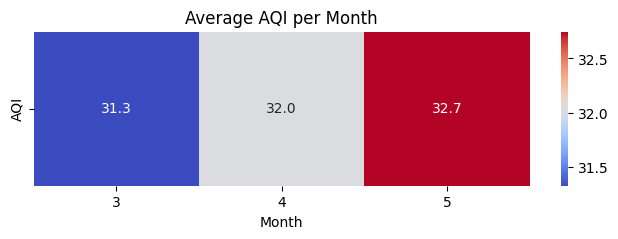

In [55]:
# Create a new column for the month
mergedSof_df_pivot['Month'] = mergedSof_df_pivot.index.month

# Calculate the average AQI per month
pivot_table = mergedSof_df_pivot.pivot_table(values='AQI', index='Month', aggfunc='mean')

# Reshape the pivot table to fit the heatmap format
pivot_table = pivot_table.T  # Transpose for better heatmap visualization

# Create a heatmap
plt.figure(figsize=(8, 2))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Average AQI per Month')
plt.xlabel('Month')
plt.ylabel('')
plt.show()

#Average AQI per hour for each month

#X-axis:month , Y-axis:average AQI per hour for each month

#Color Coding:

#Blue Shades: Represent lower AQI values, indicating better air quality.

#Red Shades: Represent higher AQI values, indicating worse air quality.

#The color bar on the right provides the AQI value range, with blue indicating values around 26-28 and red indicating values around 41.

#Observation:

#March (Month 3):

#0 to 6 AM: AQI values range from 26.4 to 28.5, indicating relatively good air quality.

#7 to 9 AM: Slight increase in AQI values, around 30.9 to 31.5.

#10 AM to 8 PM: AQI values rise significantly, peaking around 14:00-16:00 at 41.3.(not recommended to spend time outdoors)

#9 PM to 11 PM: AQI values decrease slightly but remain relatively high, around 36.2 to 36.9.

#April (Month 4):

#0 to 6 AM: AQI values are lower, ranging from 24.8 to 27.8.

#7 to 9 AM: Increase in AQI values, around 30.6 to 31.5.

#10 AM to 8 PM: Significant rise in AQI values, peaking around 15:00 at 41.3.

#9 PM to 11 PM: AQI values decrease slightly but remain high, around 34.1 to 36.7.

#May (Month 5):

#0 to 6 AM: AQI values are lower, ranging from 25.4 to 28.7.

#7 to 9 AM: Increase in AQI values, around 31.0 to 32.7.

#10 AM to 8 PM: Significant rise in AQI values, peaking around 14:00-16:00 at 39.7.

#9 PM to 11 PM: AQI values decrease slightly but remain relatively high, around 33.4 to 36.3.


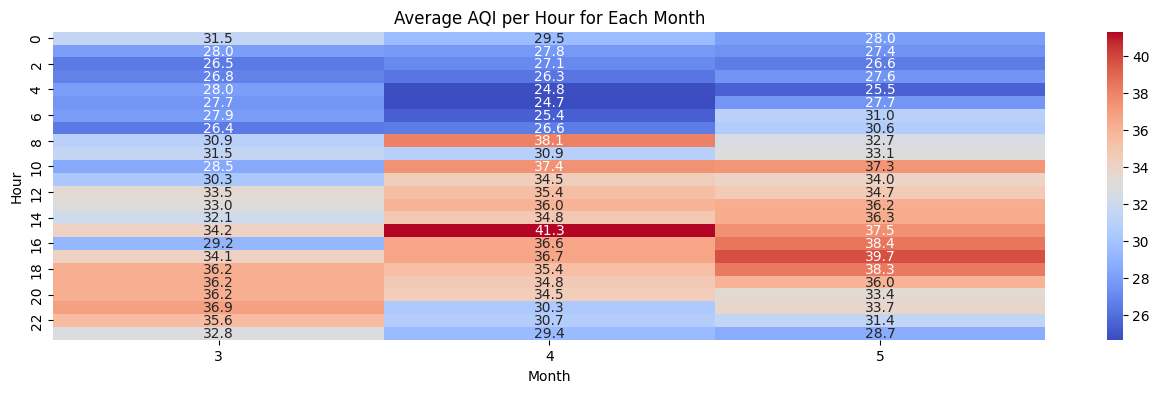

In [56]:
import seaborn as sns

# Create a new column for the month
mergedSof_df_pivot['Month'] = mergedSof_df_pivot.index.month

# Create a new column for the hour
mergedSof_df_pivot['Hour'] = mergedSof_df_pivot.index.hour

# Calculate the average AQI per hour for each month
pivot_table = mergedSof_df_pivot.pivot_table(values='AQI', index='Hour', columns='Month', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(16,4))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Average AQI per Hour for Each Month')
plt.xlabel('Month')
plt.ylabel('Hour')
plt.show()
